- **Oscar Darío Angel García nt720784**
- Max
- Alfonso

---
# Simulación Matemática - Proyecto 1

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

---
### Problema.

Los siguientes datos representan una medida anual del tráfico aéreo llamada *Abordajes*,<br>
que representa la cantidad de asientos que fueron accedidos en vuelos comerciales.

Bajo esta lógica, una misma persona podría utilizar el transporte aéreo 3 veces en un mismo año,<br>
ya sea por razones laborales, turísticas etc. y el aporte total a la cifra sería de $3$.

Estos datos están enfocados únicamente al tráfico aéreo de México, representan esta medida desde 1995 hasta 2019<br>
(un periodo total de 25 años).


Tomado de:<br>
https://data.worldbank.org/

In [2]:
data = pd.read_csv('Trafico_AereoMex.csv')
data

,Year,Abordajes
0,1995,37613
1,1996,41723
2,1997,42442
3,1998,46874
4,1999,47273
5,2000,48333
6,2001,46615
7,2002,51616
8,2003,54132
9,2004,54387


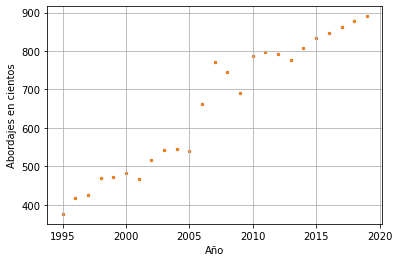

In [3]:
x=data['Year']
xn=np.array([i for i in range(25)]) #definimos una 'x' numérica para poder trabajar los datos cuantitativamente
y=data['Abordajes']/100
plt.scatter(x,y,s=5)
plt.xlabel('Año')
plt.ylabel('Abordajes en cientos')
plt.scatter(x,y,s=5)
plt.grid()

- Se buscará ajustar estos datos primeramente a curvas polinomiales desde grado 1 a 3.
- Se graficarán dichas curvas vs los datos para contrastar visualmente el ajuste.
- Se graficará el coeficiente $R^2$ vs el modelo elegido.


- Se buscará ajustar estos datos finalmente a curvas logartimica, exponencial y potencial.
- Se graficarán dichas curvas vs los datos para contrastar visualmente el ajuste.
- Se graficará el coeficiente $R^2$ vs el modelo elegido.


- Se tratará de predecir por el mejor modelo, la cantidad de abordajes que se tendrán para 2025 y 2040.
---

In [4]:
#Polinomio Grado 1
def fun1(beta,x,y):
    f=beta[0]+beta[1]*x   #la función lineal con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0=np.random.rand(2) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [5]:
sol1=opt.minimize(fun1,beta0,args=(xn,y))
ans1=[sol1.x,-sol1.fun] 
ans1 #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([382.68846939,  22.76762546]), 0.9431193765961967]

In [6]:
#Polinomio Grado 2
def fun2(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*(x**2)   #la función parabólica con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0_2=np.random.rand(3) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [7]:
sol2=opt.minimize(fun2,beta0_2,args=(xn,y))
ans2=[sol2.x,-sol2.fun] 
ans2 #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([ 3.58780978e+02,  2.90137266e+01, -2.60365380e-01]),
 0.9482270017926335]

In [30]:
#Polinomio Grado 3
def fun3(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*(x**2)+beta[3]*(x**3)   #la función cúbica con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0_3=np.random.rand(4) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [31]:
sol3=opt.minimize(fun3,beta0_3,args=(xn,y))
ans3=[sol3.x,-sol3.fun] 
ans3 #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([ 3.94097929e+02,  9.31907108e+00,  1.83358713e+00, -5.81655213e-02]),
 0.9583200532038543]

In [32]:
#A continuación se definen las funciones correspondientes a cada polinomio
   #las cuales graficaremos junto a los datos segun lo que se obtuvo
f1=sol1.x[0]+sol1.x[1]*xn
f2=sol2.x[0]+sol2.x[1]*xn+sol2.x[2]*(xn**2)
f3=sol3.x[0]+sol3.x[1]*xn+sol3.x[2]*(xn**2)+sol3.x[3]*(xn**3)

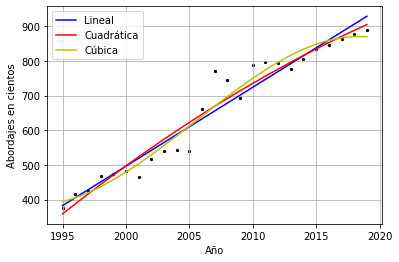

In [33]:
plt.scatter(xn+1995,y,s=5,c='black') #sumamos a la 'x' numérica el año inicial para obtener la gráfica cualitativa
plt.xlabel('Año')
plt.ylabel('Abordajes en cientos')
plt.plot(xn+1995,f1,'b',label='Lineal')
plt.plot(xn+1995,f2,'r',label='Cuadrática')
plt.plot(xn+1995,f3,'y',label='Cúbica')
plt.legend(loc='best')
plt.grid()

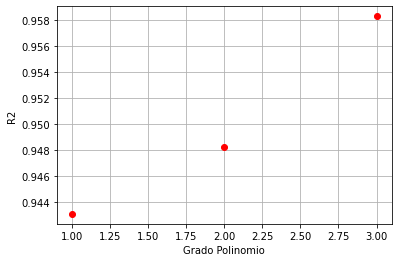

In [34]:
plt.plot(1,-sol1.fun,'or')
plt.plot(2,-sol2.fun,'or')
plt.plot(3,-sol3.fun,'or')
plt.xlabel('Grado Polinomio')
plt.ylabel('R2')
plt.grid()

Como se observa, los 3 modelos polinomiales se ajustaron bastante bien a los datos, arrojando coeficientes de $R^2$ mayores a 0.91, de lo cual se concluye que cualquiera de los 3 modelos es suficientemente preciso para realizar las predicciones, sin embargo, se utilizará el modelo de grado 3 pues es el que arrojó un indice mayor de ajuste a la curva.

In [13]:
#Modelo logaritmico
def funln(beta,x,y):
    f=beta[0]+beta[1]*np.log(x)   #la función logarítmica con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0_ln=np.random.rand(2) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [14]:
sol_ln=opt.minimize(funln,beta0_ln,args=(xn+1,y))
ans_ln=[sol_ln.x,-sol_ln.fun]
ans_ln #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([220.35637919, 187.72506527]), 0.8241269460640395]

In [15]:
#Modelo exponencial
def funexp(beta,x,y):
    f=beta[0]*np.exp(beta[1]*x)   #La función exponencial con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0_exp=np.random.rand(2) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [16]:
sol_exp=opt.minimize(funexp,beta0_exp,args=(xn+1,y))
ans_exp=[sol_exp.x,-sol_exp.fun]
ans_exp #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([4.11945332e+02, 3.36358739e-02]), 0.9156951892582496]

In [17]:
#Modelo de potencias
def funpx(beta,x,y):
    f=beta[0]*(x**beta[1])   #La función potencial con coeficientes a determinar
    return (-1 + ( np.sum((y-f)**2)/np.sum((y-np.mean(f))**2) )) #Coeficiente R2

beta0_px=np.random.rand(2) #parámetro para la función 'minimize' de Scipy, dependiente de la dimensión del array 'beta'

In [18]:
sol_px=opt.minimize(funpx,beta0_px,args=(xn+1,y))
ans_px=[sol_px.x,-sol_px.fun]
ans_px #solicitamos que python nos regrese los coeficientes beta calculados y el coeficiente R2.

[array([266.69961013,   0.36931093]), 0.9082243273088506]

In [19]:
#A continuación se definen las funciones correspondientes a cada modelo
    #las cuales graficaremos junto a los datos segun lo que se obtuvo.
        #sumamos 1 unidad a las 'x' numéricas por la naturaleza de los modelos, pues estos datos comienzan en cero,
         #y el logartimo de cero a cualquier base no está definido, mas lo que nos interesa es el rango de datos.

f_ln=sol_ln.x[0]+sol_ln.x[1]*np.log(xn+1)
f_exp=sol_exp.x[0]*np.exp(sol_exp.x[1]*(xn+1))
f_px=sol_px.x[0]*((xn+1)**sol_px.x[1])

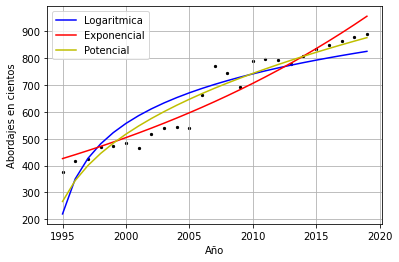

In [20]:
plt.scatter(xn+1995,y,s=5,c='black') #sumamos a la 'x' numérica el año inicial para obtener la gráfica cualitativa
plt.xlabel('Año')
plt.ylabel('Abordajes en cientos')
plt.plot(xn+1995,f_ln,'b',label='Logaritmica')
plt.plot(xn+1995,f_exp,'r',label='Exponencial')
plt.plot(xn+1995,f_px,'y',label='Potencial')
plt.legend(loc='best')
plt.grid()

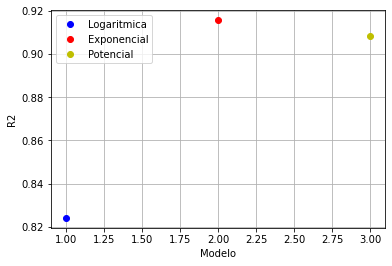

In [21]:
plt.plot(1,-sol_ln.fun,'ob',label='Logaritmica')
plt.plot(2,-sol_exp.fun,'or',label='Exponencial')
plt.plot(3,-sol_px.fun,'oy',label='Potencial')
plt.xlabel('Modelo')
plt.ylabel('R2')
plt.legend(loc='best')
plt.grid()

Como se observa, de estos 3 modelos, el logaritmico no resulta lo suficientemente preciso, con un coeficiente $R^2$ de 0.82 aproximadamente, mientras que los modelos exponencial y potencial presentan índices iguales o mayores a 0.91, siendo suficientemente precisos para predecir el comportamiento de los datos, sin embargo, se utilizará el modelo exponencial pues es el que arrojó un índice de ajuste a la curva mayor.

In [22]:
#Definición de las funciones a utilizar para las predicciones
def f(año):
    x=año-1995
    y=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*(x**2)+sol3.x[3]*(x**3)
    return (y*100)
    #Es importante notar que debido a que esta función está construida en base al modelo numérico,
    #el año ingresado deberá restarcele 1995 pues es el año cero, en el cual comienza nuestro modelo.
        #Asímismo el resultado final se multiplica por 100 pues el modelo numérico reporta los resultados en centenas.

def f_2(año):
    x=año-1995
    y=sol_exp.x[0]*np.exp(sol_exp.x[1]*x)
    return (y*100)

In [35]:
#Predicción para el año 2025
f(2025)

75342.94002647311

In [36]:
#Predicción para el año 2040
f(2040)

-77386.30700936329

* Aquí nos encontramos con que el modelo cúbico fue muy bueno para predecir el número de abordajes para un año cercano al último dato reportado en la DB. Mas fue muy impreciso con un año relativamente lejano, pues por la naturaleza que posee una función cúbica de cambiar su convección en ciertos intervalos, arrojó un dato negativo.


* Por ello, para predecir de manera más convencional datos que salen del rango de años de nuestra DB, usaremos la función exponencial, pues si bien no es más preciso que el modelo polinomial, sigue teniendo un coeficiente $R2$ elevado y por lógica sabemos que este modelo no presentará datos negativos para valores de años futuros.

In [25]:
#Nueva predicción para el año 2025
f_2(2025)

112999.3169870597

In [26]:
#Nueva predicción para el año 2040
f_2(2040)

187151.7681753301

In [37]:
#Calculando error relativo para el año 2025
err=abs(f(2025)-f_2(2025))/f_2(2025)
err

0.33324428823670565

* De esta manera, se logra predecir por el modelo cúbico, que para el año 2025, habrán `75,343` abordajes aproximadamente para el tráfico aéreo mexicano con un índice de error de $0.33$, mientras que, por el modelo exponencial, para el año 2040 habrán `187,152` abordajes aproximadamente.